Lambda School Data Science

*Unit 2, Sprint 2, Module 3*

---

# Cross-Validation


## Assignment
- [ ] [Review requirements for your portfolio project](https://lambdaschool.github.io/ds/unit2), then submit your dataset.
- [ ] Continue to participate in our Kaggle challenge. 
- [ ] Use scikit-learn for hyperparameter optimization with RandomizedSearchCV.
- [ ] Submit your predictions to our Kaggle competition. (Go to our Kaggle InClass competition webpage. Use the blue **Submit Predictions** button to upload your CSV file. Or you can use the Kaggle API to submit your predictions.)
- [ ] Commit your notebook to your fork of the GitHub repo.


**You can't just copy** from the lesson notebook to this assignment.

- Because the lesson was **regression**, but the assignment is **classification.**
- Because the lesson used [TargetEncoder](https://contrib.scikit-learn.org/categorical-encoding/targetencoder.html), which doesn't work as-is for _multi-class_ classification.

So you will have to adapt the example, which is good real-world practice.

1. Use a model for classification, such as [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
2. Use hyperparameters that match the classifier, such as `randomforestclassifier__ ...`
3. Use a metric for classification, such as [`scoring='accuracy'`](https://scikit-learn.org/stable/modules/model_evaluation.html#common-cases-predefined-values)
4. If you’re doing a multi-class classification problem — such as whether a waterpump is functional, functional needs repair, or nonfunctional — then use a categorical encoding that works for multi-class classification, such as [OrdinalEncoder](https://contrib.scikit-learn.org/categorical-encoding/ordinal.html) (not [TargetEncoder](https://contrib.scikit-learn.org/categorical-encoding/targetencoder.html))



## Stretch Goals

### Reading
- Jake VanderPlas, [Python Data Science Handbook, Chapter 5.3](https://jakevdp.github.io/PythonDataScienceHandbook/05.03-hyperparameters-and-model-validation.html), Hyperparameters and Model Validation
- Jake VanderPlas, [Statistics for Hackers](https://speakerdeck.com/jakevdp/statistics-for-hackers?slide=107)
- Ron Zacharski, [A Programmer's Guide to Data Mining, Chapter 5](http://guidetodatamining.com/chapter5/), 10-fold cross validation
- Sebastian Raschka, [A Basic Pipeline and Grid Search Setup](https://github.com/rasbt/python-machine-learning-book/blob/master/code/bonus/svm_iris_pipeline_and_gridsearch.ipynb)
- Peter Worcester, [A Comparison of Grid Search and Randomized Search Using Scikit Learn](https://blog.usejournal.com/a-comparison-of-grid-search-and-randomized-search-using-scikit-learn-29823179bc85)

### Doing
- Add your own stretch goals!
- Try other [categorical encodings](https://contrib.scikit-learn.org/categorical-encoding/). See the previous assignment notebook for details.
- In additon to `RandomizedSearchCV`, scikit-learn has [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html). Another library called scikit-optimize has [`BayesSearchCV`](https://scikit-optimize.github.io/notebooks/sklearn-gridsearchcv-replacement.html). Experiment with these alternatives.
- _[Introduction to Machine Learning with Python](http://shop.oreilly.com/product/0636920030515.do)_ discusses options for "Grid-Searching Which Model To Use" in Chapter 6:

> You can even go further in combining GridSearchCV and Pipeline: it is also possible to search over the actual steps being performed in the pipeline (say whether to use StandardScaler or MinMaxScaler). This leads to an even bigger search space and should be considered carefully. Trying all possible solutions is usually not a viable machine learning strategy. However, here is an example comparing a RandomForestClassifier and an SVC ...

The example is shown in [the accompanying notebook](https://github.com/amueller/introduction_to_ml_with_python/blob/master/06-algorithm-chains-and-pipelines.ipynb), code cells 35-37. Could you apply this concept to your own pipelines?


### BONUS: Stacking!

Here's some code you can use to "stack" multiple submissions, which is another form of ensembling:

```python
import pandas as pd

# Filenames of your submissions you want to ensemble
files = ['submission-01.csv', 'submission-02.csv', 'submission-03.csv']

target = 'status_group'
submissions = (pd.read_csv(file)[[target]] for file in files)
ensemble = pd.concat(submissions, axis='columns')
majority_vote = ensemble.mode(axis='columns')[0]

sample_submission = pd.read_csv('sample_submission.csv')
submission = sample_submission.copy()
submission[target] = majority_vote
submission.to_csv('my-ultimate-ensemble-submission.csv', index=False)
```

In [1]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Kaggle-Challenge/master/data/'
    !pip install category_encoders==2.*

# If you're working locally:
else:
    DATA_PATH = './'

In [2]:
import pandas as pd

# Merge train_features.csv & train_labels.csv
train = pd.merge(pd.read_csv(DATA_PATH+'waterpumps/train_features.csv'), 
                 pd.read_csv(DATA_PATH+'waterpumps/train_labels.csv'))

# Read test_features.csv & sample_submission.csv
test = pd.read_csv(DATA_PATH+'waterpumps/test_features.csv')
sample_submission = pd.read_csv(DATA_PATH+'waterpumps/sample_submission.csv')

In [3]:
test.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,...,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,...,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,...,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split

train = pd.merge(pd.read_csv(DATA_PATH+'waterpumps/train_features.csv'), 
                 pd.read_csv(DATA_PATH+'waterpumps/train_labels.csv'))
test = pd.read_csv(DATA_PATH+'waterpumps/test_features.csv')
sample_submission = pd.read_csv(DATA_PATH+'waterpumps/sample_submission.csv')

train = train.set_index('id')
test = test.set_index('id')

train.shape, test.shape

((59400, 40), (14358, 39))

In [5]:
import numpy as np
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="StudentTest")


# We will use the lat/long for the basin for the missing lat/long
# Since the basin is either Lake Victoria or Lake Tanganyika for 
# the entries with missing lat/long, we set up a dictionary
# with the lat/long for those 2 locations
# display(out_df[out_df.latitude.isna()].basin.value_counts())
# Lake Victoria      1713
# Lake Tanganyika      99

get_loc = lambda x: geolocator.geocode(x, timeout=20)
get_lat_long = lambda x: (get_loc(x).latitude, get_loc(x).longitude)

locs = {'Lake Victoria':{'latitude':0, 'longitude':0}, 'Lake Tanganyika':{'latitude':0, 'longitude':0}}

for loc in locs:
  locs[loc]['latitude'], locs[loc]['longitude'] = get_lat_long(loc)

# Looking up the data dictionary at https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table/page/25/#features_list
# Create a list of redundant columns
# recorded_by - constant valued
# num_private - undefined and mostly zero
# extraction_type, extraction_type_group - the same information ia available in extraction_type_class
# payment - same as payment_type
# water_quality - same as quality_group
# quantity - same as quantity_group
# source, source_class - same as source_type
# waterpoint_type - waterpoint_type_group

#red_cols = ['recorded_by', 'num_private','extraction_type','extraction_type_group','payment', 'quantity', 'water_quality', 'source', 'source_class', 'waterpoint_type']

red_cols = ['recorded_by', 'num_private']

# Get a series with the cardinality of the nonnumeric features
cardinality = train.select_dtypes(exclude='number').nunique()

# Get a list of all categorical features with cardinality > 50
high_card = cardinality[cardinality > 50].index.tolist()
print(high_card)

# Columns with missing data 
#nan_drop = ['public_meeting', 'scheme_management', 'scheme_name','permit', 'funder', 'installer', 'subvillage']

nan_drop = ['scheme_name']
def wrangle(in_df, drop = nan_drop):

  out_df = in_df.drop(columns=drop).copy()

  # About 3% of the time, latitude has small values near zero,
  # outside Tanzania, so we'll treat these values like zero.
  out_df['latitude'] = out_df['latitude'].replace(-2e-08, 0)
    
  # When columns have zeros and shouldn't, they are like null values.
  # A longitude or latitude of zero is outside Tanzania and therefore wrong.
  # So we will replace the zeros with nulls, and then fix them by using
  # the lat/long for the basin.
  latlong = ['longitude', 'latitude']
  misc = ['construction_year','population']
  for col in latlong+misc:
    out_df[col] = out_df[col].replace(0, np.nan)

  # Fix missing lat/long values
  for col in latlong:
    out_df.loc[out_df[col].isna(), col] = out_df[out_df[col].isna()].basin.apply(lambda x: locs[x][col])

  # Fix missing construction_year values   
  col = 'construction_year'
  out_df.loc[out_df[col].isna(), col] = 1955
  # Convert date_recorded to datetime
  out_df.date_recorded = out_df.date_recorded.astype('datetime64[ns]')
    
  # Extract components from date_recorded, then drop the original column
  out_df['year_recorded'] = out_df.date_recorded.dt.year
  out_df['month_recorded'] = out_df.date_recorded.dt.month
  out_df['day_recorded'] = out_df.date_recorded.dt.day
  out_df = out_df.drop(columns='date_recorded')
    
  # Engineer feature: how many years from construction_year to date_recorded
  out_df['years'] = out_df.year_recorded - out_df.construction_year

  print(out_df.isna().sum())
  print(out_df.shape)
  # return the wrangled dataframe
  return out_df

['date_recorded', 'funder', 'installer', 'wpt_name', 'subvillage', 'lga', 'ward', 'scheme_name']


In [6]:
train = wrangle(train)
test = wrangle(test)

amount_tsh                   0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population               21381
public_meeting            3334
recorded_by                  0
scheme_management         3877
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_group                0
quantity                     0
quantity_group               0
source  

In [7]:
target = 'status_group'

X = train.drop(columns=[target]).copy()
y = train[target].copy()

In [8]:
from sklearn.model_selection import train_test_split

# YOUR CODE HERE

X_train, X_val, y_train, y_val = train_test_split(X,y,train_size=0.8, random_state=42)


In [9]:
baseline_acc = y_train.value_counts(normalize=True)[0]

print('Baseline Accuracy:', baseline_acc)

Baseline Accuracy: 0.5429713804713805


In [10]:
%%time 

from category_encoders import OrdinalEncoder, OneHotEncoder
from category_encoders.glmm import GLMMEncoder
from category_encoders.target_encoder import TargetEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# YOUR CODE HERE

model = make_pipeline(
  OrdinalEncoder(), 
  SimpleImputer(strategy="median"),
  RandomForestClassifier(random_state=0,n_jobs=-1, max_depth=25, min_samples_leaf=2, n_estimators=137, max_features=0.25)
)


model.fit(X_train, y_train)

training_acc =  model.score(X_train, y_train)
validation_acc =  model.score(X_val, y_val)

'''
most_frequent
-------------
Training Accuracy: 0.9539351851851852
Validation Accuracy: 0.8133838383838384

median
------
Training Accuracy: 0.9532617845117846
Validation Accuracy: 0.8164983164983165

mean
----
Training Accuracy: 0.9531144781144781
Validation Accuracy: 0.8162457912457912
'''
print('Training Accuracy:', training_acc)
print('Validation Accuracy:', validation_acc)

Training Accuracy: 0.9532617845117846
Validation Accuracy: 0.8164983164983165
CPU times: user 27.5 s, sys: 312 ms, total: 27.8 s
Wall time: 2.99 s


In [11]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import randint, uniform

pipeline = make_pipeline(
  OrdinalEncoder(), 
  SimpleImputer(strategy='mean'),
  RandomForestClassifier(random_state=0,n_jobs=-1))

param_distributions = {
    
    
#     Remove this hyperparameter, because of an issue: 
#     https://github.com/scikit-learn-contrib/categorical-encoding/issues/184
#     'targetencoder__smoothing': uniform(1, 1000), 
    
    #'simpleimputer__strategy': ['mean', 'median'], 
    'randomforestclassifier__n_estimators': randint(50, 500), 
    'randomforestclassifier__max_depth': [5, 10, 15, 20, 25, 30, None], 
    'randomforestclassifier__max_features': uniform(0, 1.0), 
    'randomforestclassifier__min_samples_leaf': randint(1, 5), 
}

param_grid = {
    
    
#     Remove this hyperparameter, because of an issue: 
#     https://github.com/scikit-learn-contrib/categorical-encoding/issues/184
#     'targetencoder__smoothing': uniform(1, 1000), 
    
    'simpleimputer__strategy': ['mean', 'median'], 
    'randomforestclassifier__n_estimators': [99, 101, 103, 125, 137], 
    'randomforestclassifier__max_depth': [15, 20, 25, 30], 
    'randomforestclassifier__max_features': [0.1, 0.2, 0.3, 0.4, 0.5], 
    'randomforestclassifier__min_samples_leaf': range(1,3), 
}


# If you're on Colab, decrease n_iter & cv parameters
search = RandomizedSearchCV(
    pipeline, 
    param_distributions=param_distributions, 
    n_iter=5, 
    cv=5, 
    scoring='accuracy', 
    verbose=10, 
    return_train_score=True, 
    n_jobs=-1
)


'''
search = GridSearchCV(
    pipeline, 
    param_grid=param_grid, 
    cv=3, 
    scoring='accuracy', 
    verbose=10, 
    return_train_score=True, 
    n_jobs=-1
)
'''
search.fit(X_train, y_train);

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  25 | elapsed:    6.1s remaining:   45.1s
[Parallel(n_jobs=-1)]: Done   6 out of  25 | elapsed:   18.7s remaining:   59.2s
[Parallel(n_jobs=-1)]: Done   9 out of  25 | elapsed:  1.3min remaining:  2.3min
[Parallel(n_jobs=-1)]: Done  12 out of  25 | elapsed:  1.5min remaining:  1.6min
[Parallel(n_jobs=-1)]: Done  15 out of  25 | elapsed:  1.6min remaining:  1.1min
[Parallel(n_jobs=-1)]: Done  18 out of  25 | elapsed:  1.8min remaining:   43.0s
[Parallel(n_jobs=-1)]: Done  21 out of  25 | elapsed:  2.7min remaining:   31.0s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  3.0min finished


In [12]:
print('Best hyperparameters', search.best_params_)
print('Cross-validation score', search.best_score_)

nmodel = search.best_estimator_

training_acc =  nmodel.score(X_train, y_train)
validation_acc =  nmodel.score(X_val, y_val)


print('Training Accuracy:', training_acc)
print('Validation Accuracy:', validation_acc)


'''
GridSearchCV results with
param_grid = {
    
    
#     Remove this hyperparameter, because of an issue: 
#     https://github.com/scikit-learn-contrib/categorical-encoding/issues/184
#     'targetencoder__smoothing': uniform(1, 1000), 
    
    'simpleimputer__strategy': ['mean', 'median'], 
    'randomforestclassifier__n_estimators': [99, 101, 103, 125, 137], 
    'randomforestclassifier__max_depth': [15, 20, 25, 30], 
    'randomforestclassifier__max_features': [0.1, 0.2, 0.3, 0.4, 0.5], 
    'randomforestclassifier__min_samples_leaf': range(1,3), 
}

search = GridSearchCV(
    pipeline, 
    param_grid=param_grid, 
    cv=3, 
    scoring='accuracy', 
    verbose=10, 
    return_train_score=True, 
    n_jobs=-1
)



Best hyperparameters {'randomforestclassifier__max_depth': 25, 'randomforestclassifier__max_features': 0.2, 'randomforestclassifier__min_samples_leaf': 2, 'randomforestclassifier__n_estimators': 125, 'simpleimputer__strategy': 'median'}
Cross-validation score 0.8039141414141414
Training Accuracy: 0.9478535353535353
Validation Accuracy: 0.812962962962963
'''

Best hyperparameters {'randomforestclassifier__max_depth': None, 'randomforestclassifier__max_features': 0.7909464800817094, 'randomforestclassifier__min_samples_leaf': 3, 'randomforestclassifier__n_estimators': 468}
Cross-validation score 0.8035143097643097
Training Accuracy: 0.944297138047138
Validation Accuracy: 0.8122895622895623


"\nGridSearchCV results with\nparam_grid = {\n    \n    \n#     Remove this hyperparameter, because of an issue: \n#     https://github.com/scikit-learn-contrib/categorical-encoding/issues/184\n#     'targetencoder__smoothing': uniform(1, 1000), \n    \n    'simpleimputer__strategy': ['mean', 'median'], \n    'randomforestclassifier__n_estimators': [99, 101, 103, 125, 137], \n    'randomforestclassifier__max_depth': [15, 20, 25, 30], \n    'randomforestclassifier__max_features': [0.1, 0.2, 0.3, 0.4, 0.5], \n    'randomforestclassifier__min_samples_leaf': range(1,3), \n}\n\nsearch = GridSearchCV(\n    pipeline, \n    param_grid=param_grid, \n    cv=3, \n    scoring='accuracy', \n    verbose=10, \n    return_train_score=True, \n    n_jobs=-1\n)\n\n\n\nBest hyperparameters {'randomforestclassifier__max_depth': 25, 'randomforestclassifier__max_features': 0.2, 'randomforestclassifier__min_samples_leaf': 2, 'randomforestclassifier__n_estimators': 125, 'simpleimputer__strategy': 'median'}\nCr

In [13]:
y_pred = model.predict(test)

submission = pd.DataFrame(index=test.index)
submission['status_group'] = y_pred

submission.head()

,status_group
id,
50785,non functional
51630,functional
17168,functional
45559,non functional
49871,functional


In [14]:
submission.to_csv('kaggle_20.csv')



137


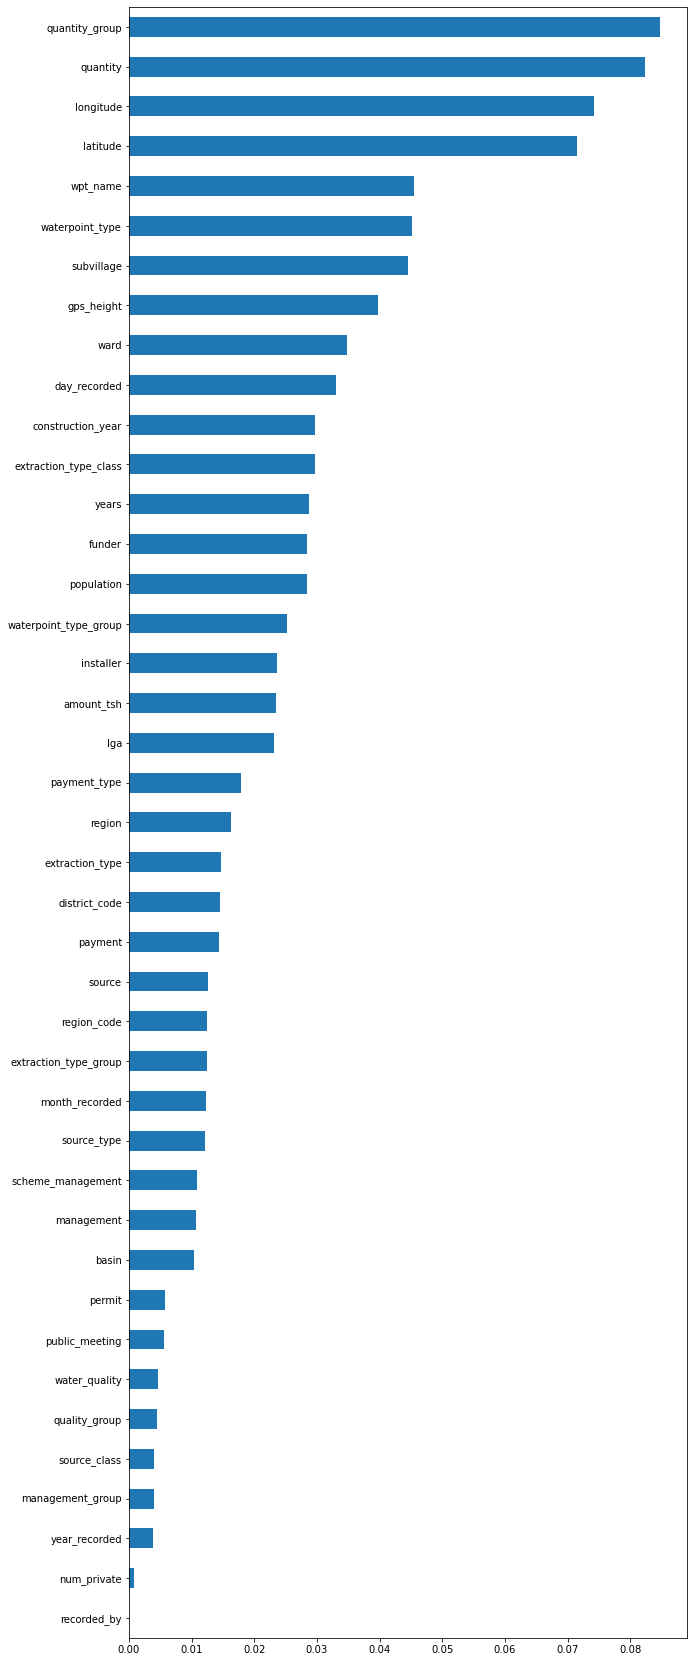

In [15]:
import matplotlib.pyplot as plt

# YOUR CODE HERE
classifier = model.named_steps['randomforestclassifier']

print(len(classifier.estimators_))
columns = X_val.columns
importances = pd.Series(classifier.feature_importances_, columns)
plt.figure(figsize=(10,30))
importances.sort_values().plot.barh()